
# Exercise

We will work with some files from the publicly available dataset 'Instacart Market Basket Analysis': https://www.kaggle.com/c/instacart-market-basket-analysis/data

You must import the datasets order_products_train.csv, and products.csv; they are located in the folder data/instacart. Then, perform the following tasks:

1. Verify if the datasets have missing values in any of its columns.
2. Plot a bar chart with the 15 most common purchased products.
3. Plot a bar chart with the 15 most common purchased products that have been reordered.

For tasks 2 and 3 you must show the name of the products as labels instead of the id.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
order= pd.read_csv('data/instacart/order_products_train.csv')
print(order.head())
products= pd.read_csv('data/instacart/products.csv')
print(products.head())

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


# 1.Missing Values

In [3]:
#Valores faltantes en order
print('El archivo de ordenes contiene los siguientes valores nulos:',order.isnull().sum())
print('El archivo de productos contiene los siguientes valores nulos:',products.isnull().sum())

El archivo de ordenes contiene los siguientes valores nulos: order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
El archivo de productos contiene los siguientes valores nulos: product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


# 2.Plot a bar chart with the 15 most common purchased products

In [4]:
data= pd.merge(order,products,how='left', on='product_id')
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15


In [5]:
totales= data.groupby(by=['product_id','product_name']).count()

In [6]:
totales.sort_values(by=['add_to_cart_order'],ascending=False,inplace=True)
totales.reset_index(inplace=True)
totales.head()

,product_id,product_name,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,24852,Banana,18726,18726,18726,18726,18726
1,13176,Bag of Organic Bananas,15480,15480,15480,15480,15480
2,21137,Organic Strawberries,10894,10894,10894,10894,10894
3,21903,Organic Baby Spinach,9784,9784,9784,9784,9784
4,47626,Large Lemon,8135,8135,8135,8135,8135


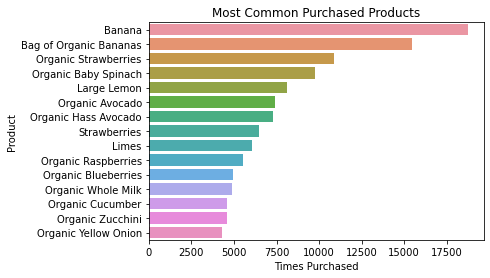

In [7]:
sn.barplot(data=totales.head(15),y='product_name',x='add_to_cart_order')
plt.title("Most Common Purchased Products")
plt.xlabel("Times Purchased")
plt.ylabel("Product")
plt.show()

# 3.Plot a bar chart with the 15 most common purchased products that have been reordered.

In [8]:
totales= data[data.reordered>0].groupby(by=['product_id','product_name']).count()
totales.sort_values(by=['add_to_cart_order'],ascending=False,inplace=True)
totales.reset_index(inplace=True)
#totales.head(15)

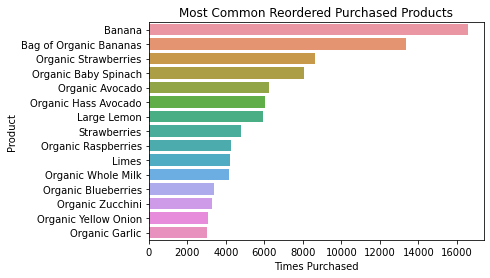

In [9]:
sn.barplot(data=totales.head(15),y='product_name',x='add_to_cart_order')
plt.title('Most Common Reordered Purchased Products')
plt.xlabel('Times Purchased')
plt.ylabel('Product')
plt.show()